<a href="https://colab.research.google.com/github/Vaishali0418/Machine_Learning/blob/main/WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine quality prediction**

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaishalirathore24","key":"47444d9d4c32fc37177eec0f64f62529"}'}

In [12]:
!pip install -q kaggle

In [13]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
! kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 2.29MB/s]


In [15]:
!unzip /content/red-wine-quality-cortez-et-al-2009.zip

Archive:  /content/red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


## Importing the Dependencies

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# modelling
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [17]:
data = pd.read_csv('/content/winequality-red.csv')

## 1.Display Top 5 Rows of the Dataset

In [18]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2.Check Last 5 Rows of the dataset

In [19]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# 3.Check Sample Of The data

In [ ]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
362,11.9,0.580,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,10.0,5
227,9.0,0.820,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,5
703,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4
808,7.4,0.530,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5


## 4. Describe Dataset

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 5. Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From the above data we got to know that the wine is acidic in nature as the pH level of wine is less than 7 which can cause liver disease, increase in cholestrol, heart attck, etc

## Data visualization

<Figure size 500x600 with 0 Axes>

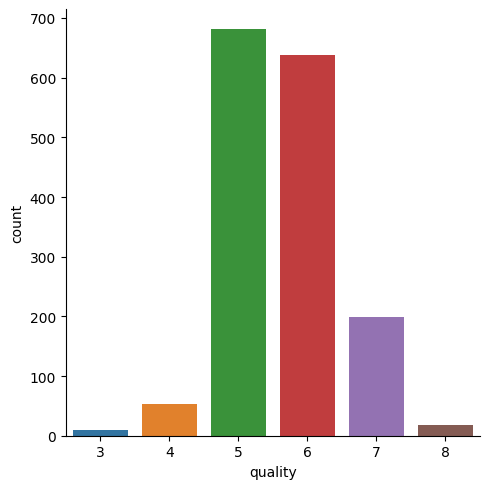

In [ ]:
#mostly wine has the quality of 5,6

plt.figure(figsize=(5,6))
sns.catplot(x='quality', data=data, kind='count')

<ipython-input-17-3d16b179d0bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['quality'])


<Axes: ylabel='Density'>

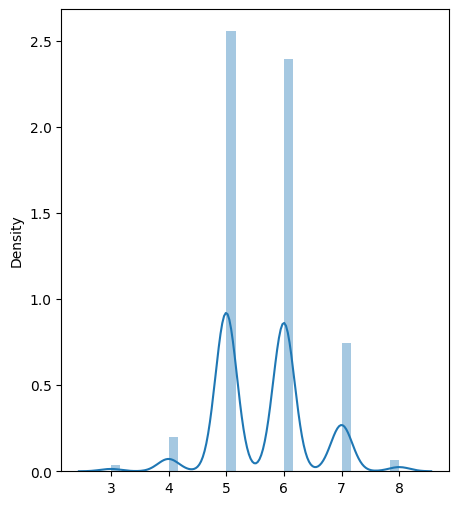

In [ ]:
plt.figure(figsize=(5,6))
sns.distplot(x=data['quality'])

<Axes: >

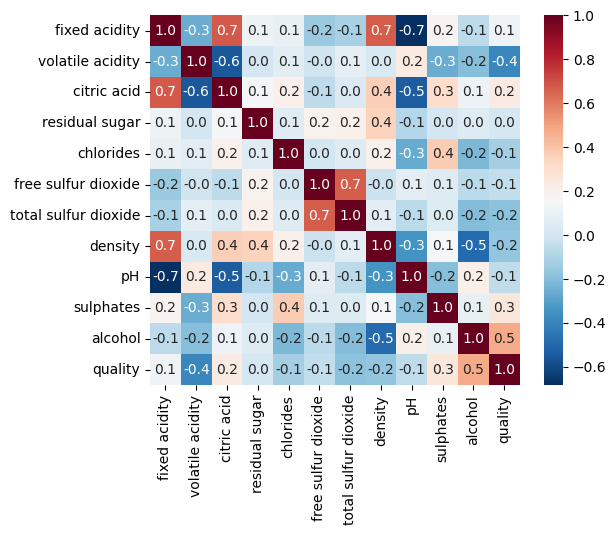

In [ ]:
correction = data.corr()
sns.heatmap(correction, annot=True, cbar=True, square=True, fmt='.1f', cmap="RdBu_r") # from here we can see alcohol is showing the maximum positive correlation with quality

## Exploratory Data Analysis

**Histograms of Variates**

To better understand the distributions of the variates in the data, we can plot histograms for the individual variates.

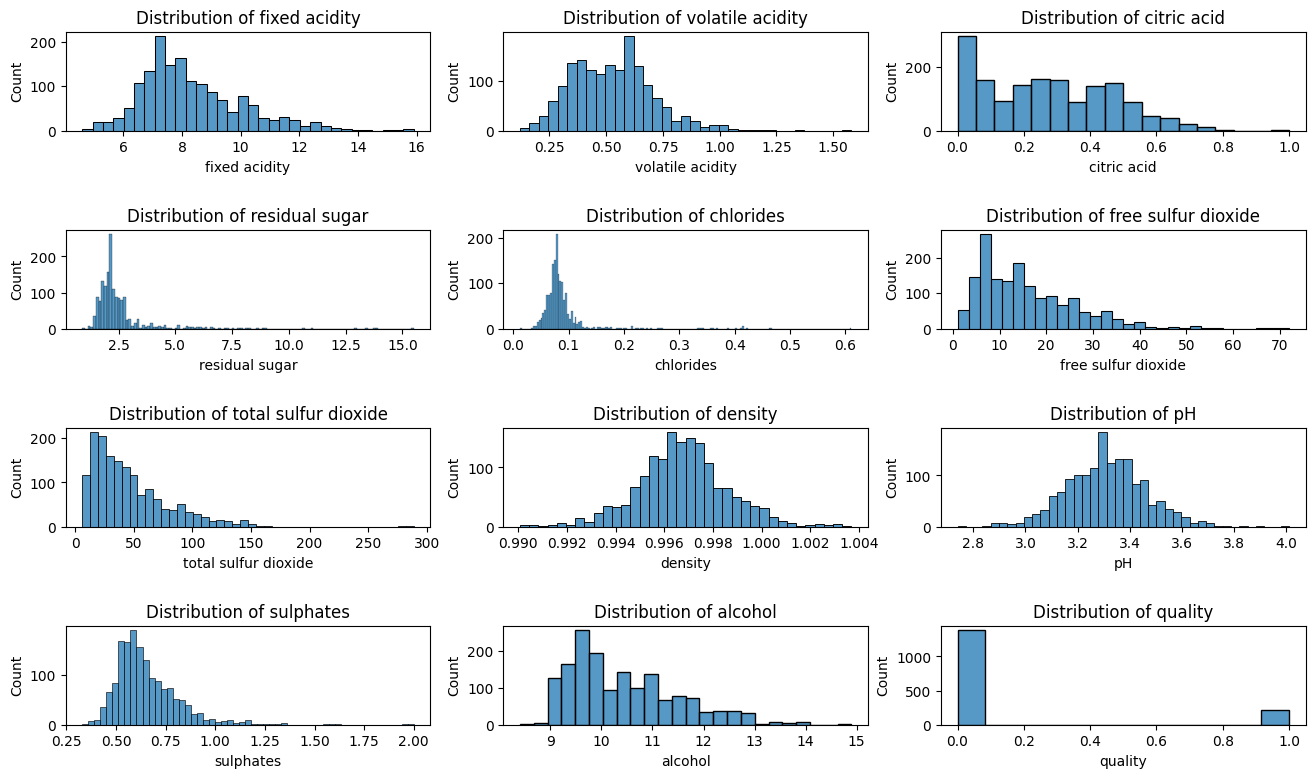

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 9))
plt.subplots_adjust(hspace=1)

for ax, col in zip(axes.flat, data.columns):
    sns.histplot(data=data, x=col, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.show()

We see that wine quality is actually a categorical (integer) value. As such, it makes sense to treat it as a category during our EDA.

**Boxenplots of Variates vs. Quality**

As the quality of the wine is the thing that we want to predict, a natural graphical visualization we could look at would be distributions of the variates after taking the quality of the wine into account.

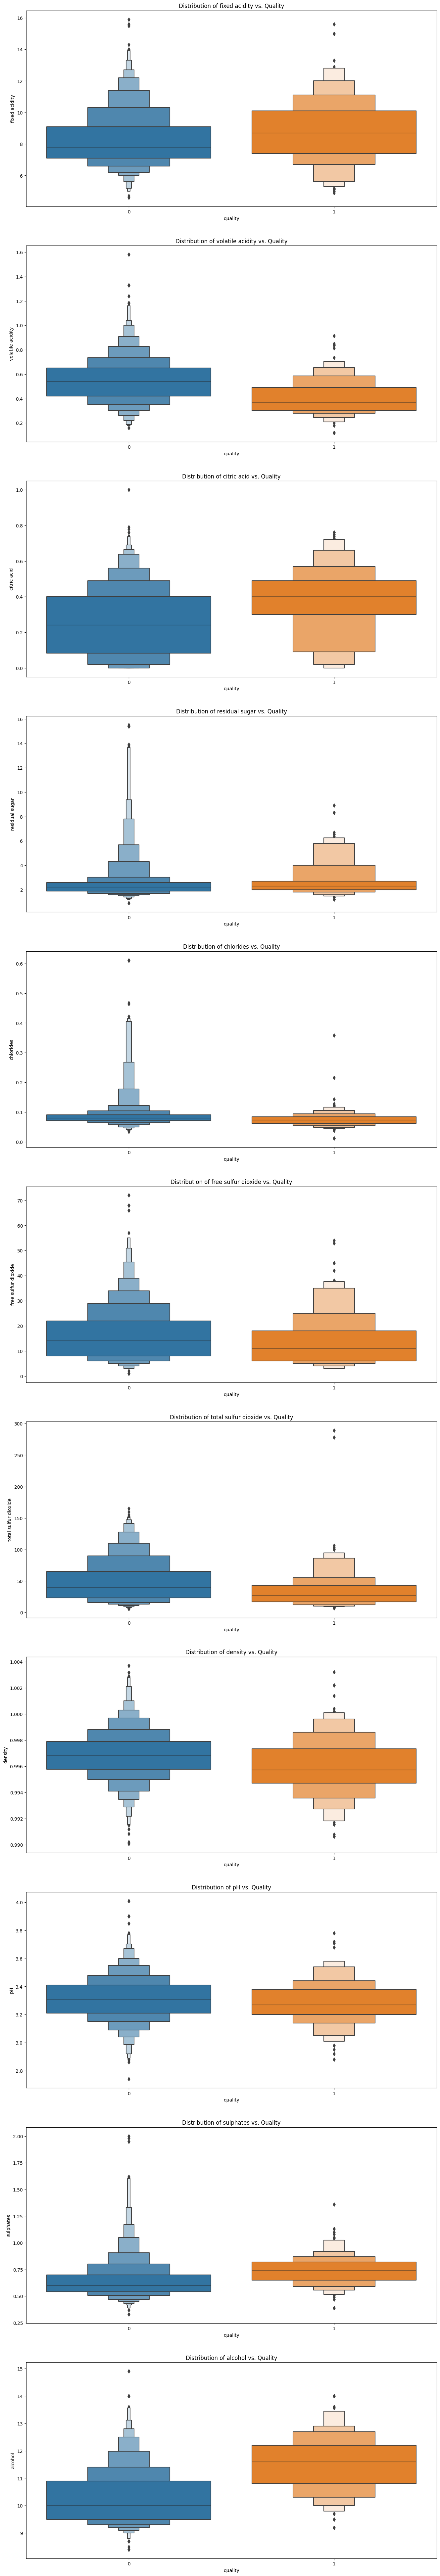

In [ ]:
# convert quality to categorical variate
data["quality category"] = data["quality"].astype("category")

fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(16, 100))
# plt.subplots_adjust(hspace=1)
for ax, col in zip(axes.flat, data.columns[:-1]):
    sns.boxenplot(data=data, y=col, x="quality", ax=ax)
    ax.set_title(f"Distribution of {col} vs. Quality")

plt.show()

**Correlation Matrix**

We can better understand the correlations between the variates by using a correlation matrix.

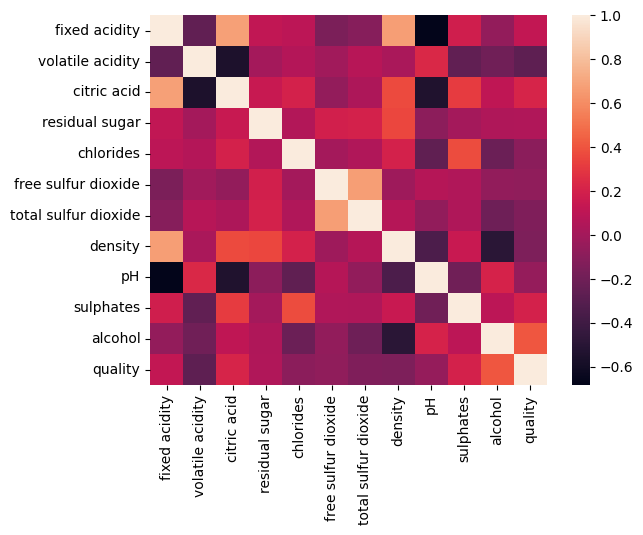

In [ ]:
ax = sns.heatmap(data.corr(numeric_only=True))
plt.show()

From this, we see that the variates are relatively uncorrelated. The only contenders of multicollinearity seem to be

1.fixed acidity and citric acid;

2.free sulfur dioxide and total sulfur dioxide.

We might want to consider removing these variates before modelling to improve model performance.

## Data Preprocessing

In [ ]:
# converting quality column, if quality is greater than or equal to 7 to be 1 else 0
data['quality']=data['quality'].apply(lambda x: 1 if x>=7 else 0)
data['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()


# scaling the data

data_scale = scale.fit_transform(data)
data_scaled = pd.DataFrame(data_scale)
data_scaled.columns = data.columns
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


splitting X and y

In [ ]:
X = data_scaled.drop('quality', axis=1)
Y = data_scaled.quality

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.4)
print(X_train.shape, X_test.shape)

(959, 11) (640, 11)


Using Grid Search cv

In [ ]:
param = {
    'n_estimators':[50,100,75,200],
    'max_depth':[20,30,40],
    'min_samples_split':[1,2,5,10]
}


from sklearn.model_selection import GridSearchCV

gsv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, cv=5, scoring='accuracy')

gsv.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 75, 200]},
             scoring='accuracy')

In [ ]:
model = gsv.best_estimator_
model.score(X_test, Y_test)

0.9015625

## Train/Test Split

Prior to modelling, we will split our data into training, validation and test sets.

In [ ]:
explanatory_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']
response_col = ['quality']

X = data[explanatory_cols]
y = data[response_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1279, 9)
Shape of y_train: (1279, 1)
Shape of X_test: (320, 9)
Shape of y_test: (320, 1)


## Modelling

For our predictive model, we will be trying different regression algorithms and choosing the best one to tune. To do this, we will be employing (stratified) K-fold cross-validation.

In [ ]:
models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('hist_gradient_boosting', HistGradientBoostingRegressor()),
    ('svr', SVR()),
    ('k_neighbors', KNeighborsRegressor())
]

## Training

In [ ]:
def create_pipeline(name, model):
    return Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])

n_splits = 5
skf = StratifiedKFold(n_splits = n_splits, shuffle=True)

best_loss = np.inf
best_model_name = None

for name, model in models:
    print("-"*25)
    print(f"Training MODEL {name}")
    print("-"*25)
    val_losses = []

    for i, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        print(f"Training on FOLD {i+1}")
        X_train_act = X_train.iloc[train_index].values
        X_val = X_train.iloc[val_index].values
        y_train_act = y_train.iloc[train_index].values.ravel()
        y_val = y_train.iloc[val_index].values.ravel()

        pipe = create_pipeline(name, model)

        pipe.fit(X_train_act, y_train_act)
        y_val_pred = pipe.predict(X_val)
        mse = mean_squared_error(y_val, y_val_pred)
        print(f"MSE on validation set: {mse}")
        print()

        val_losses.append(mse)

    average_loss = np.mean(val_losses)
    print(f"Average MSE: {average_loss}")
    if average_loss < best_loss:
        best_loss = average_loss
        best_model_name = name

print()
print(f"Best model: {best_model_name}")
print(f"MSE: {best_loss}")

-------------------------
Training MODEL random_forest
-------------------------
Training on FOLD 1
MSE on validation set: 0.08056953124999999

Training on FOLD 2
MSE on validation set: 0.081892578125

Training on FOLD 3
MSE on validation set: 0.08657148437500001

Training on FOLD 4
MSE on validation set: 0.08142148437499999

Training on FOLD 5
MSE on validation set: 0.06793411764705883

Average MSE: 0.07967783915441176
-------------------------
Training MODEL gradient_boosting
-------------------------
Training on FOLD 1
MSE on validation set: 0.10081388493820431

Training on FOLD 2
MSE on validation set: 0.08656674802934575

Training on FOLD 3
MSE on validation set: 0.08914925050240033

Training on FOLD 4
MSE on validation set: 0.09714312216331815

Training on FOLD 5
MSE on validation set: 0.07273657754176224

Average MSE: 0.08928191663500615
-------------------------
Training MODEL hist_gradient_boosting
-------------------------
Training on FOLD 1
MSE on validation set: 0.092824436

## Hyperparameter Tuning

We can further tune the parameters of the RandomForest model using GridSearchCV to try to get a better score.

In [ ]:
models_dict = dict(models)
best_model = models_dict[best_model_name]

pipeline = create_pipeline(best_model_name, best_model)
parameters_grid = {
    f"random_forest__n_estimators": [30, 50, 100, 200],
    f"random_forest__max_depth": [None, 4, 6],
    f"random_forest__max_features": [None, "sqrt", "log2"]
}
search = GridSearchCV(pipeline, parameters_grid)

search.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [None, 4, 6],
                         'random_forest__max_features': [None, 'sqrt', 'log2'],
                         'random_forest__n_estimators': [30, 50, 100, 200]})

We can see the best parameters:

In [ ]:
search.best_params_

{'random_forest__max_depth': None,
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 200}

## Feature Importance

We can next investigate the relative feature importance of our model.

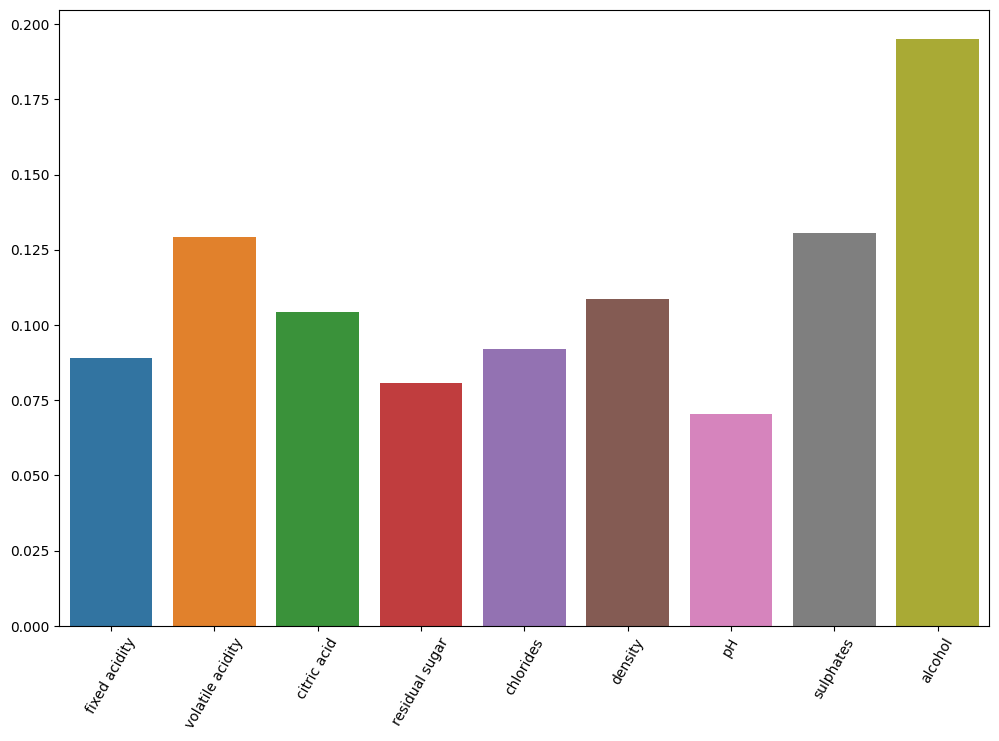

In [ ]:
best_pipeline = search.best_estimator_
feature_importances = best_pipeline.named_steps["random_forest"].feature_importances_

plt.figure(figsize=(12, 8))
plt.xticks(rotation = 60)

ax = sns.barplot(x=explanatory_cols, y=feature_importances)
plt.show()

## Prediction

We can now predict the wine quality scores on the test dataset.

In [ ]:
y_pred = best_pipeline.predict(X_test)
print(f"MSE for test dataset: {mean_squared_error(y_pred, y_test)}")

MSE for test dataset: 0.04173039062499999


To see the accuracy of the predictions, we can plot the predictions and the actual ratings for the test dataset on a scatterplot. If our predictive model is good, we should expect to see that the points should be close to the line y = x

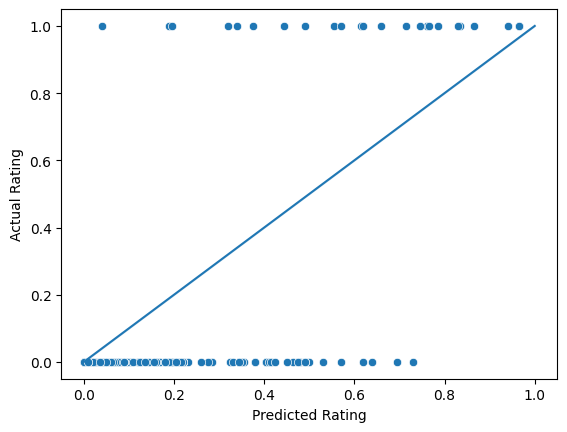

In [ ]:
flat_y_test = y_test.values.flatten()
ax = sns.scatterplot(x=y_pred, y=flat_y_test)
sns.lineplot(x=flat_y_test, y=flat_y_test, ax=ax)
ax.set_xlabel("Predicted Rating")
ax.set_ylabel("Actual Rating")
plt.show()

We see that our model does a pretty good job at predicting the wine rating.